# Data Analysis - India - Rainfall and Economic activity

## Data source

1. [All India area weighted monthly, seasonal and annual rainfall](https://data.gov.in/resources/all-india-area-weighted-monthly-seasonal-and-annual-rainfall-mm-1901-2015) - This fileis updated at source till 2015.
2. [India GDP data](http://mospi.nic.in/sites/default/files/press_releases_statements/statement11_27mar15.xls) - Raw XLS file. I have seperated it into two separate csv files.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Initilization of data
rainfallStat_df = pd.read_csv('india-rainfall.csv', index_col=0)
print(rainfallStat_df.shape)

gdpStat_df = pd.read_csv('india-gdp-1950-2013.csv', index_col=0)
print(gdpStat_df.shape)

gdpPDStat_df = pd.read_csv('india-gdp-perc-1950-2013.csv', index_col=0)
print(gdpPDStat_df.shape)

(113, 17)
(28, 127)
(28, 65)


In [3]:
# Processing data
agriChangeYoY = gdpStat_df.iloc[1, 64:-1]
agriChangeYoY.index = agriChangeYoY.index.map(lambda label : int(label[:4]))

annRainSeries = rainfallStat_df['ANN'].pct_change()
annRainSeries = annRainSeries[50:-1]

agriPDSeries = gdpPDStat_df.iloc[1, 1:-2]
agriPDSeries.index = agriPDSeries.index.map(lambda label : int(label[:4]))

# New dataframe to hold the results
result_df = pd.DataFrame()
result_df['Agriculture'] = agriChangeYoY
result_df['Rainfall'] = annRainSeries * 100
result_df['AgriPD'] = agriPDSeries
result_df.index = agriChangeYoY.index

# result_df.plot()

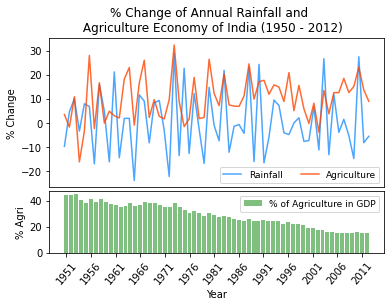

In [4]:
import matplotlib.gridspec as gridspec

# Creating GridSpec and adding subplots
gspec = gridspec.GridSpec(10, 10)
plt.subplots_adjust(top=0.87)

majorGrid = plt.subplot(gspec[0:7, :])
minorGrid = plt.subplot(gspec[7:, :])

# Plotting
majorGrid.plot(result_df.index, result_df['Rainfall'], label='Rainfall', color='dodgerblue', alpha=0.8)
majorGrid.plot(result_df.index, result_df['Agriculture'], label='Agriculture', color='orangered', alpha=0.8)
majorGrid.set_ylabel('% Change')
majorGrid.set_xticks([])
majorGrid.legend(ncol=2, fontsize=9, loc='lower right')

minorGrid.bar(result_df.index, result_df['AgriPD'], color='green', alpha=0.5, label='% of Agriculture in GDP')
minorGrid.set_xlabel('Year')
minorGrid.set_ylabel('% Agri')
minorGrid.legend(fontsize=9, loc='upper right')
minorGrid.set_xticks(range(1951, 2012, 5))
for tickLabel in minorGrid.get_xticklabels():
    tickLabel.set_rotation(50)

plt.suptitle('% Change of Annual Rainfall and \n Agriculture Economy of India (1950 - 2012)')

plt.savefig('india-rainfall-gdp.png', dpi=700)

In [5]:
from scipy import stats
stats.ttest_ind(result_df['Rainfall'], result_df['Agriculture'])

Ttest_indResult(statistic=-4.60174660003133, pvalue=1.0338659894818292e-05)